In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json

In [2]:
pred = [[1,2], [3,4]]
weights = [0.002,0.002]

In [3]:
np.average(pred, axis=0, weights=weights)

array([2., 3.])

In [4]:
path_reports = "../reports/"

In [5]:
columns = ["Model name", "Accuracy", "Data noise"]
data = list()
pathlist = Path(path_reports).glob('**/accuracies.json')
for path in pathlist:
     if 'Feedback_4block_to_1block_10_epochs' not in str(path):
        path_in_str = str(path)
        model_name = '-'.join(path_in_str.split('/')[2:-1])
        #print(path_in_str.split('/'))
        print(model_name)
        with open(path_in_str) as json_file:
            accuracies = json.load(json_file)
            for acc, noise in zip([accuracies['test_acc_original_data'],
                                accuracies['test_acc_gaussian_noise'],
                                accuracies['test_acc_salt_pepper_noise']],
                               ["without_noise", "gaussian_noise", "salt_pepper_noise"]):
                data.append([model_name, round(acc,2), noise])

frozenVGG16-Feedback_5block_to_3block_3_projection_layers
frozenVGG16-Feedback_5block_to_3block
frozenVGG16-Feedback_4block_to_1block_2_projection_layers
frozenVGG16-Feedback_4block_to_4block
frozenVGG16-Forward_5_4_3_blocks_not_frozen
frozenVGG16-Feedback_5block_to_3block_2_projection_layers
frozenVGG16-Feedback_4block_to_1block
frozenVGG16-Feedback_5block_to_4block
frozenVGG16-Forward
frozenVGG16-Forward_5block_not_frozen
frozenVGG16-Forward_5_4_blocks_not_frozen
frozenVGG16-Feedback_5block_to_5block
frozenVGG16-Feedback_4block_to_1block_1_projection_layers
notFrozenVGG16-VGG16Feedback 4Block To 1Block
notFrozenVGG16-VGG16Feedback 4Block To 4Block
notFrozenVGG16-VGG16Forward
frozenVGG16TrainGaussianNoise-Feedback_5block_to_3block
frozenVGG16TrainGaussianNoise-Feedback_4block_to_4block
frozenVGG16TrainGaussianNoise-Forward_5_4_3_blocks_not_frozen
frozenVGG16TrainGaussianNoise-Feedback_4block_to_1block
frozenVGG16TrainGaussianNoise-Forward
frozenVGG16TrainGaussianNoise-Forward_5block_n

In [6]:
training_res = pd.DataFrame(data, columns=columns).sort_values(by='Model name', ascending=True)

In [7]:
def plot_accuracies(df, title='Test accuracies'):
    sns.set(rc={#'axes.facecolor':'white',
                #'figure.facecolor':'white',
                "grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, s=100, x="Accuracy", y="Model name", hue="Data noise")\
        .set(title=title)

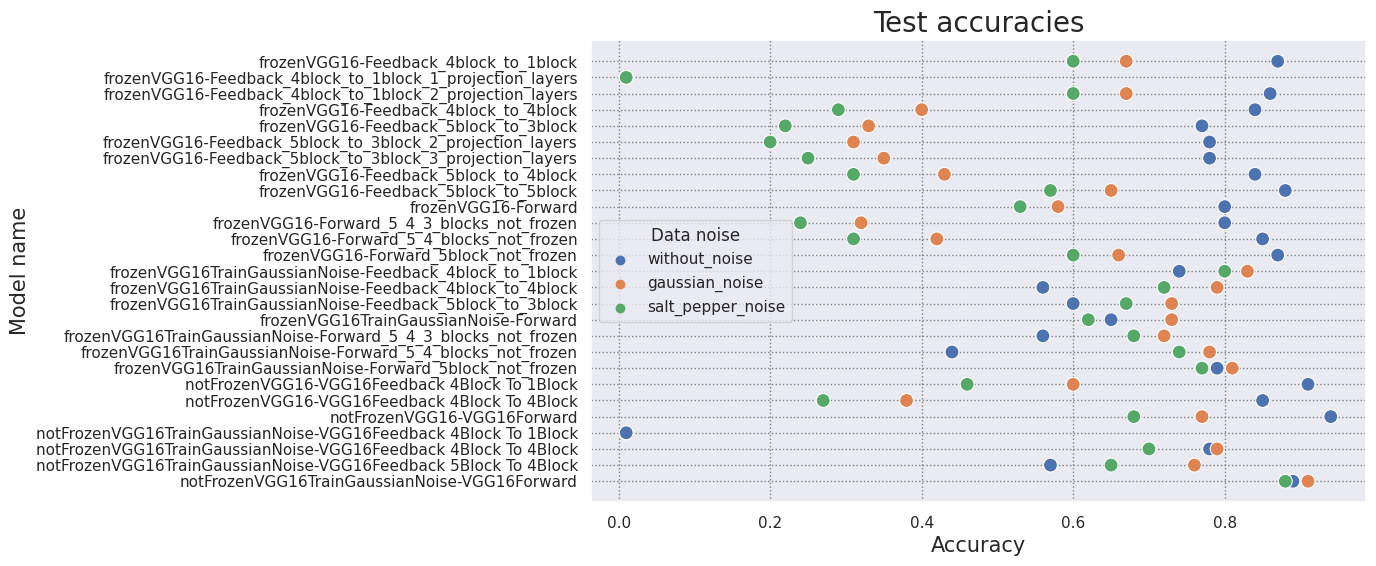

In [8]:
plot_accuracies(training_res)

In [9]:
not_frozen_ds = training_res.loc[training_res['Model name'].str.contains('notFrozen')]

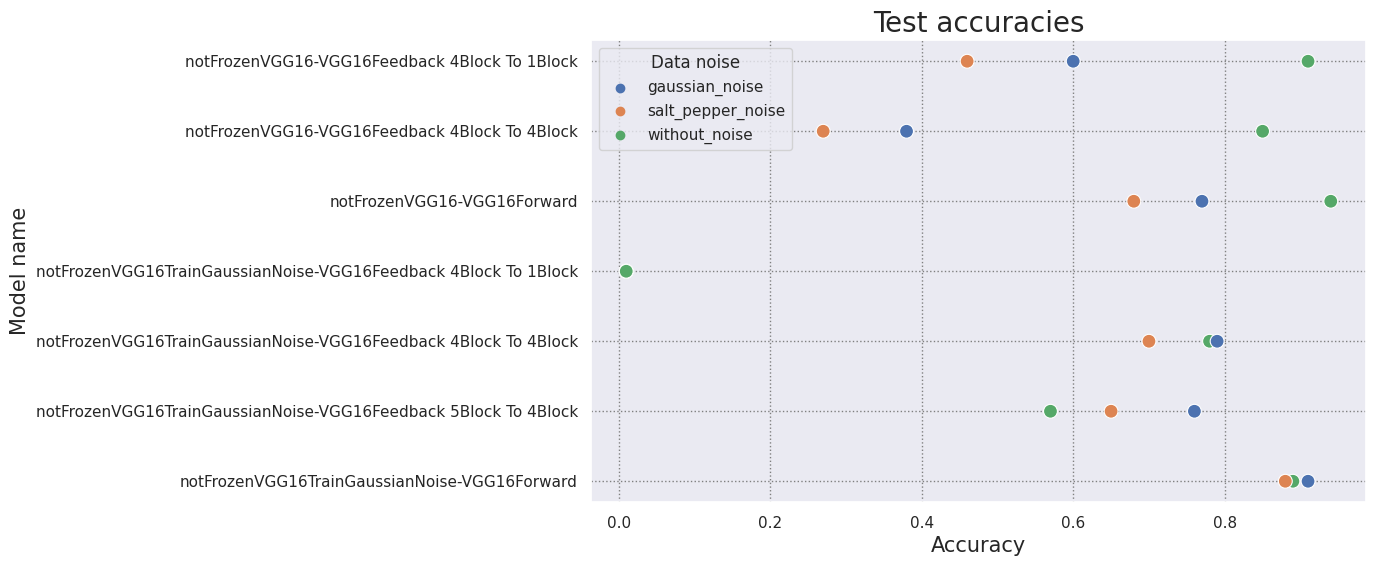

In [10]:
plot_accuracies(not_frozen_ds)

In [11]:
frozen_ds = training_res.loc[~training_res['Model name'].str.contains('notFrozen')]

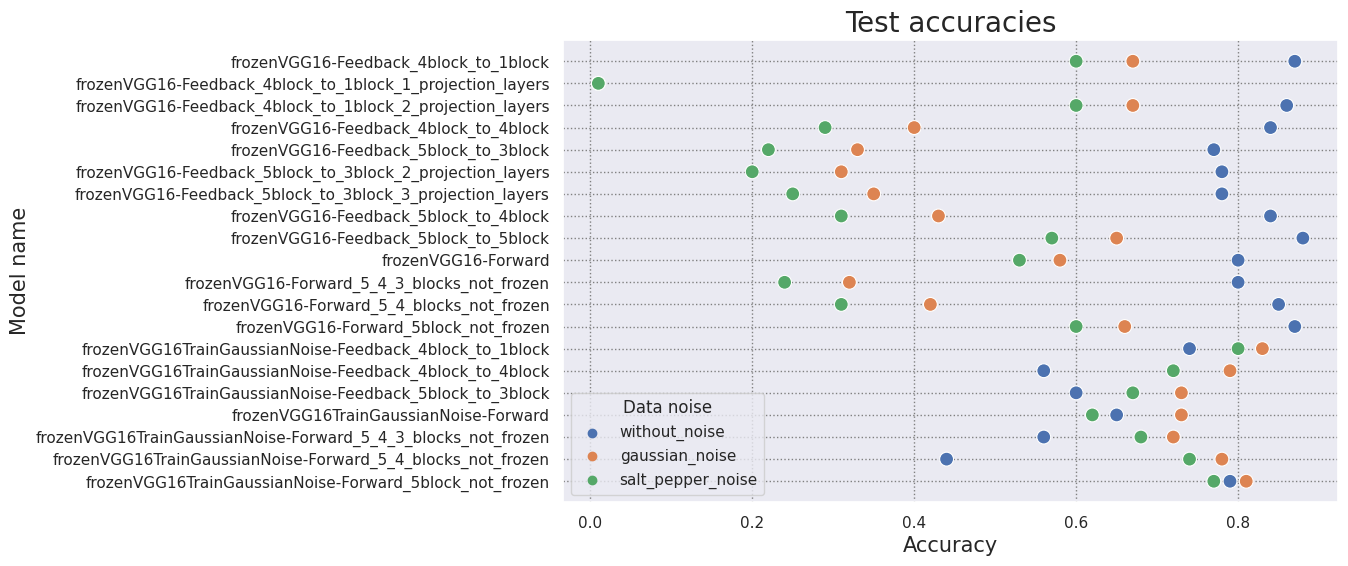

In [12]:
plot_accuracies(frozen_ds)

In [13]:
gaussian = training_res.loc[training_res['Model name'].str.contains('Gaussian')]

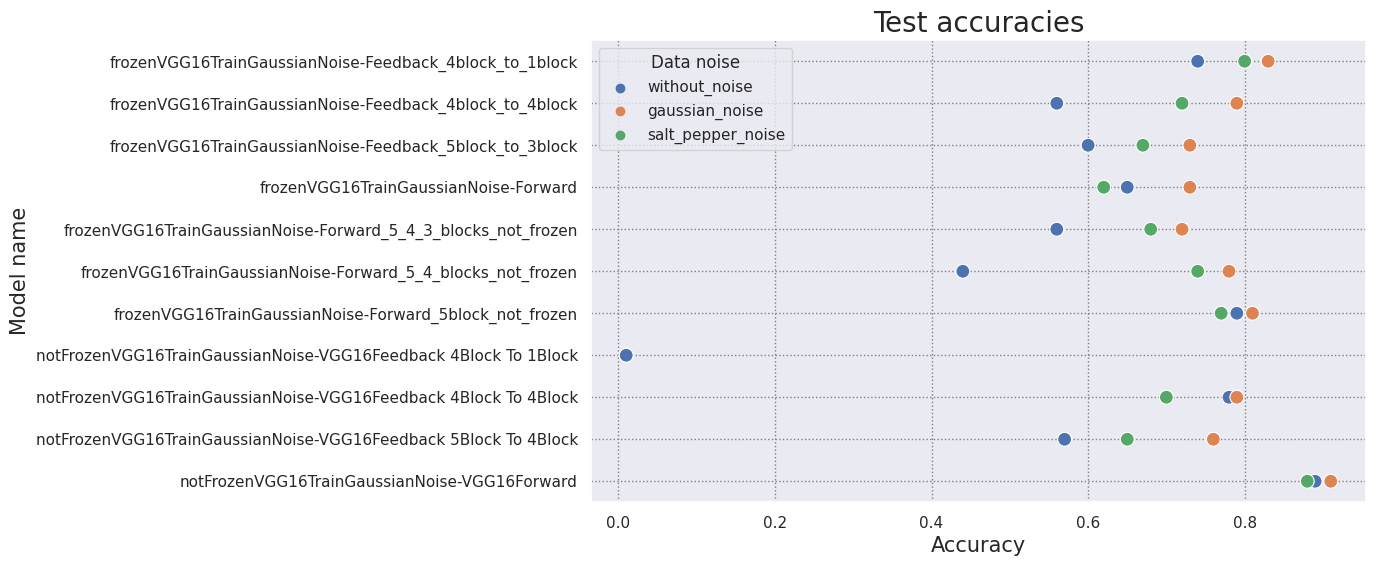

In [14]:
plot_accuracies(gaussian)

In [15]:
answer_research_question = training_res.loc[training_res['Model name'].str.contains('5block_not_frozen') | training_res['Model name'].str.contains('4block_to_1block')]

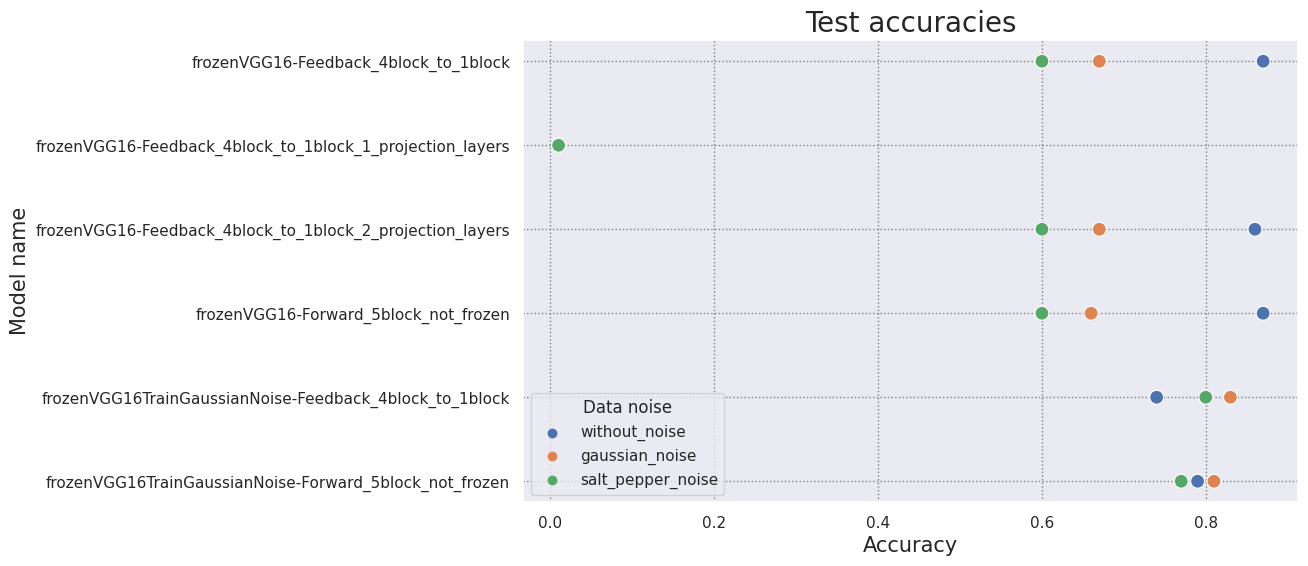

In [16]:
plot_accuracies(answer_research_question)

In [17]:
ds_5_3_block = training_res.loc[training_res['Model name'].str.contains('VGG16-Feedback_5block_to_3block')]

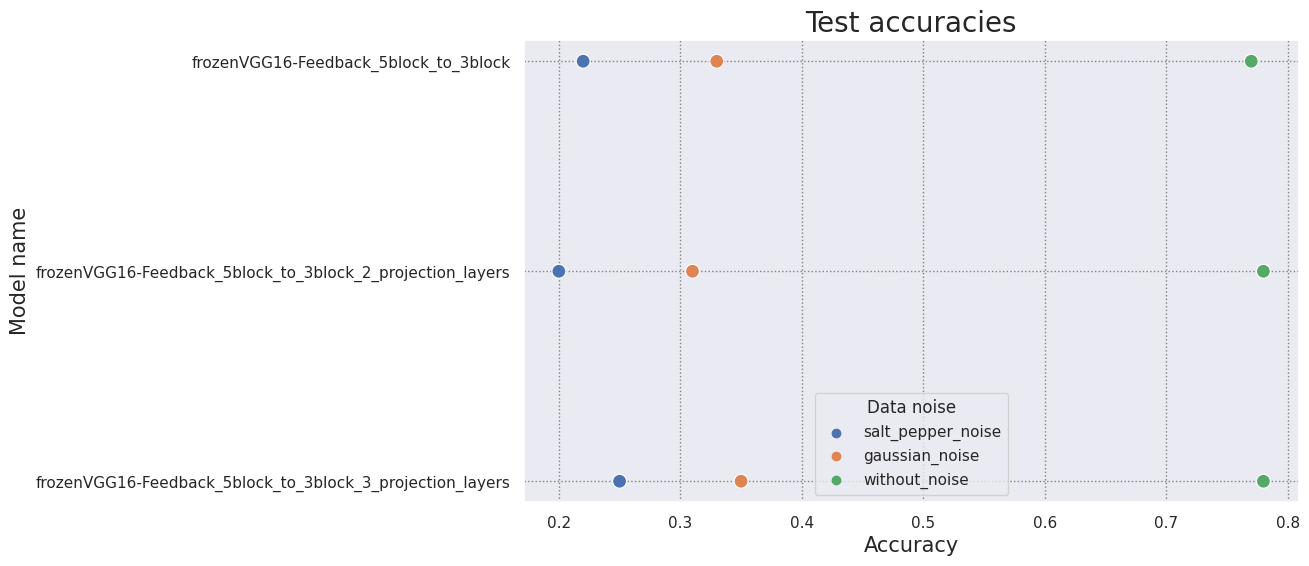

In [18]:
plot_accuracies(ds_5_3_block)

In [19]:
ds_5_3_block[ds_5_3_block["Data noise"] == "without_noise"]

,Model name,Accuracy,Data noise
3,frozenVGG16-Feedback_5block_to_3block,0.77,without_noise
15,frozenVGG16-Feedback_5block_to_3block_2_projec...,0.78,without_noise
0,frozenVGG16-Feedback_5block_to_3block_3_projec...,0.78,without_noise


In [20]:
answer_research_question2 = training_res.loc[training_res['Model name'].str.contains('5_4_blocks_not_frozen')\
                                             | training_res['Model name'].str.contains('5block_to_4block')\
                                             | training_res['Model name'].str.contains('5Block To 4Block')\
                                             | training_res['Model name'].str.contains('5Block To 4Block')]

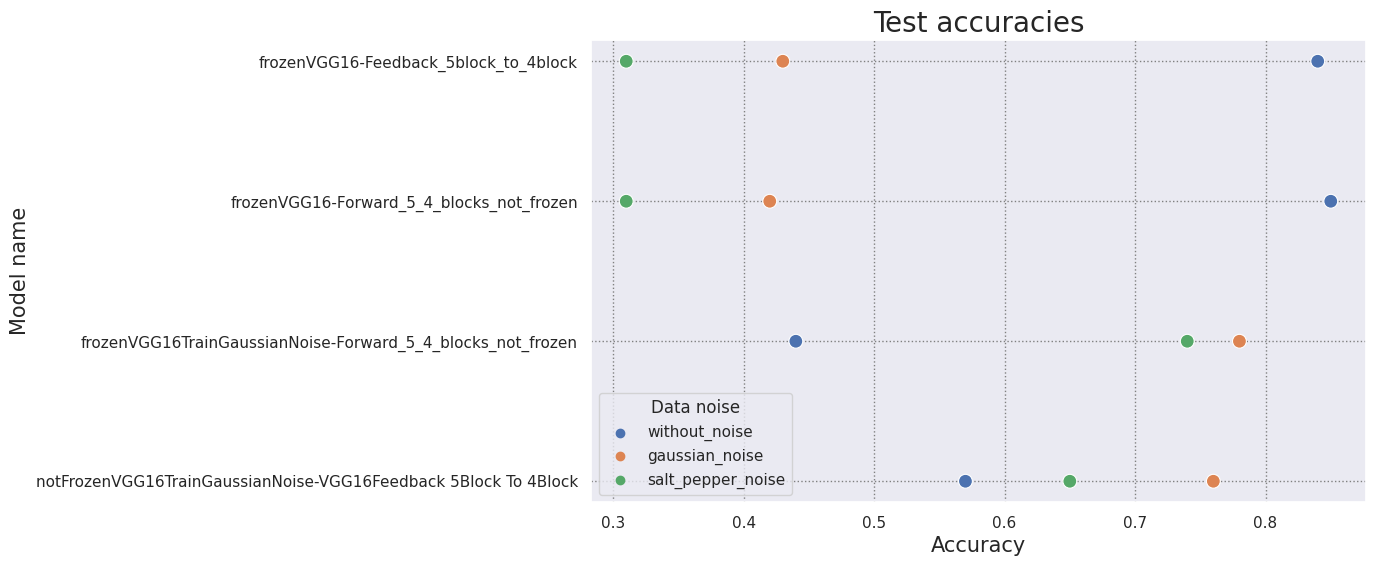

In [21]:
plot_accuracies(answer_research_question2)

In [79]:
def show_values_on_bar_plot(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

def plot_bar_plot(df, title='Test accuracies', mode="v", figsize=(20,10)):
    sns.set(rc={
                "grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots(figsize=figsize)
    palette ={"gaussian_noise": "C0", "without_noise": "C1", "salt_pepper_noise": "C2"}
    #unique = df["Model name"].unique()
    #palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
    splot = sns.barplot(data=df, y="Accuracy", x="Model name", hue="Data noise", palette=palette)
    splot.set(title=title)
    plt.legend(loc='lower right')
    show_values_on_bar_plot(splot, mode, space=0)

# Frozen network

In [44]:
answer_research_question_prepared= answer_research_question.copy()
answer_research_question_prepared['Model name'] = answer_research_question_prepared['Model name']\
                                        .str.replace('frozenVGG16-Feedback_4block_to_1block',\
                                                     'Feedback')\
                                        .str.replace('frozenVGG16-Forward_5block_not_frozen',\
                                                     'Forward')\
                                        .str.replace('frozenVGG16TrainGaussianNoise-Forward_5block_not_frozen',\
                                                     'ForwardGaussian')\
                                        .str.replace('frozenVGG16TrainGaussianNoise-Feedback_4block_to_1block',\
                                                     'FeedbackGaussian')

In [45]:
answer_research_question1 = answer_research_question_prepared[(~answer_research_question_prepared["Model name"].str.contains("Gaussian"))\
                                                             & (~answer_research_question_prepared["Model name"].str.contains("projection"))]

In [46]:
answer_research_question1

,Model name,Accuracy,Data noise
18,Feedback,0.87,without_noise
19,Feedback,0.67,gaussian_noise
20,Feedback,0.60,salt_pepper_noise
29,Forward,0.60,salt_pepper_noise
28,Forward,0.66,gaussian_noise
27,Forward,0.87,without_noise


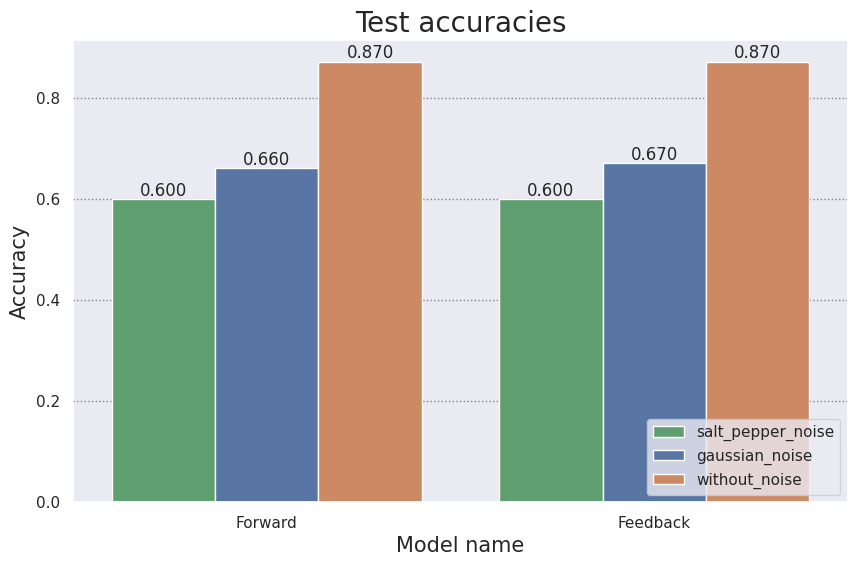

In [47]:
plot_bar_plot(answer_research_question1.sort_values(by="Model name", ascending=False))

In [48]:
answer_research_question2 = answer_research_question_prepared[answer_research_question_prepared["Model name"].str.contains("Forward")]

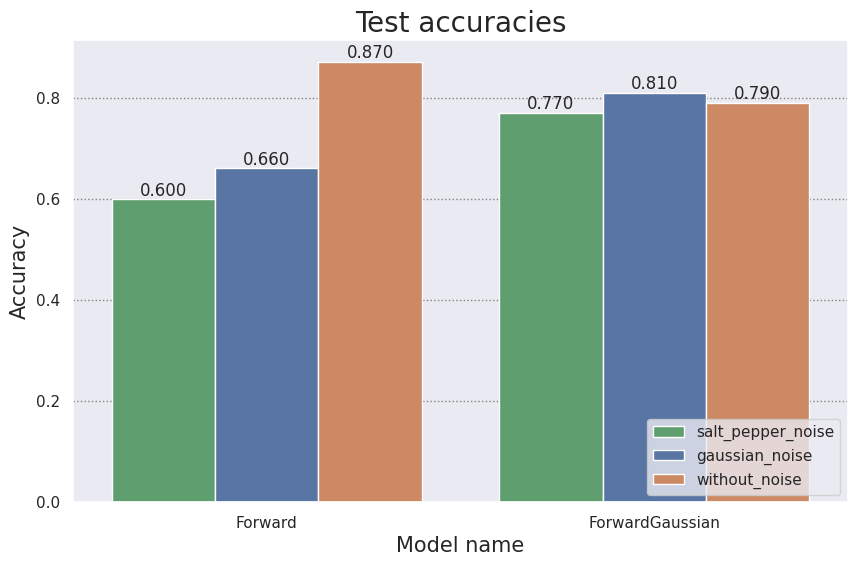

In [49]:
plot_bar_plot(answer_research_question2.sort_values(by="Model name", ascending=True))

In [50]:
answer_research_question3 = answer_research_question_prepared[answer_research_question_prepared["Model name"].str.contains("Gaussian")]

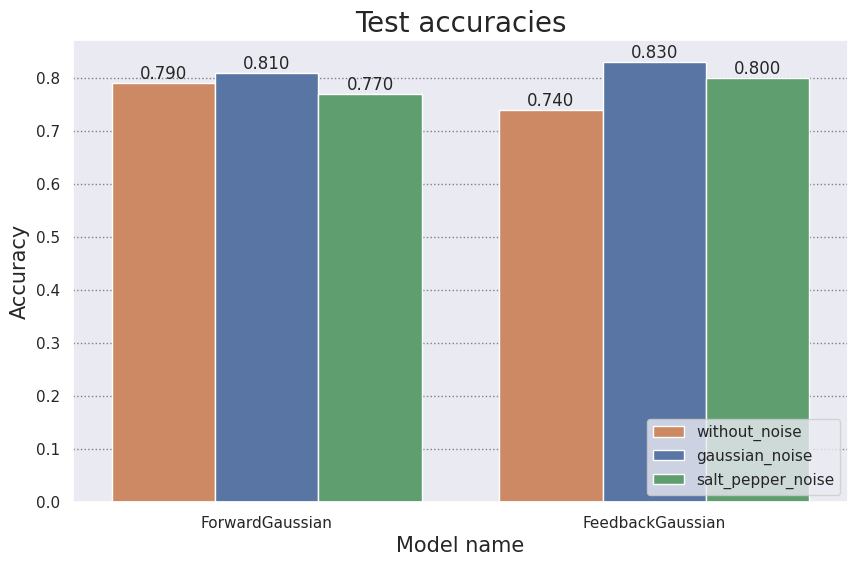

In [52]:
plot_bar_plot(answer_research_question3.sort_values(by="Model name", ascending=False))

In [62]:
compare_pairs = [("Forward543Frozen","frozenVGG16-Forward_5_4_3_blocks_not_frozen", "Feedback5To3","frozenVGG16-Feedback_5block_to_3block"),\
                ("Forward54Frozen","frozenVGG16-Forward_5_4_blocks_not_frozen", "Feedback5To4", "frozenVGG16-Feedback_5block_to_4block"),\
                ("Forward54Frozen","frozenVGG16-Forward_5_4_blocks_not_frozen", "Feedback4To4","frozenVGG16-Feedback_4block_to_4block"),\
                ("Forward5Frozen","frozenVGG16-Forward_5block_not_frozen", "Feedback5To5","frozenVGG16-Feedback_5block_to_5block")]
compare_pairs_gaussian = [("ForwardGaussian543Frozen","frozenVGG16TrainGaussianNoise-Forward_5_4_3_blocks_not_frozen", "FeedbackGaussian5To3","frozenVGG16TrainGaussianNoise-Feedback_5block_to_3block"),\
                ("ForwardGaussian54Frozen","frozenVGG16TrainGaussianNoise-Forward_5_4_blocks_not_frozen", "FeedbackGaussian4To4","frozenVGG16TrainGaussianNoise-Feedback_4block_to_4block"),\
                ("ForwardGaussian5Frozen","frozenVGG16TrainGaussianNoise-Forward_5block_not_frozen", "FeedbackGaussian4To1","frozenVGG16TrainGaussianNoise-Feedback_4block_to_1block")]

/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/860982452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepare_df['Model name'] = prepare_df['Model name']\
/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/860982452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepare_df['Model name'] = prepare_df['Model name']\
/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/860982452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

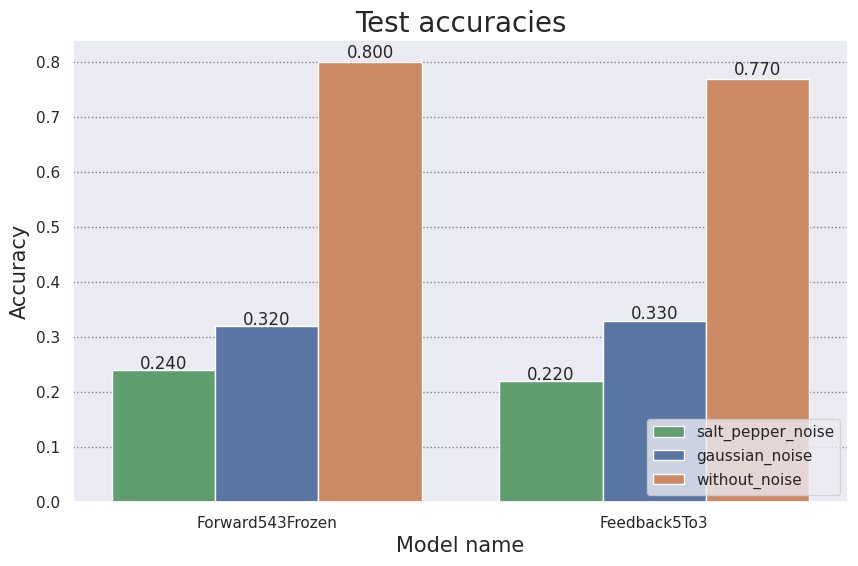

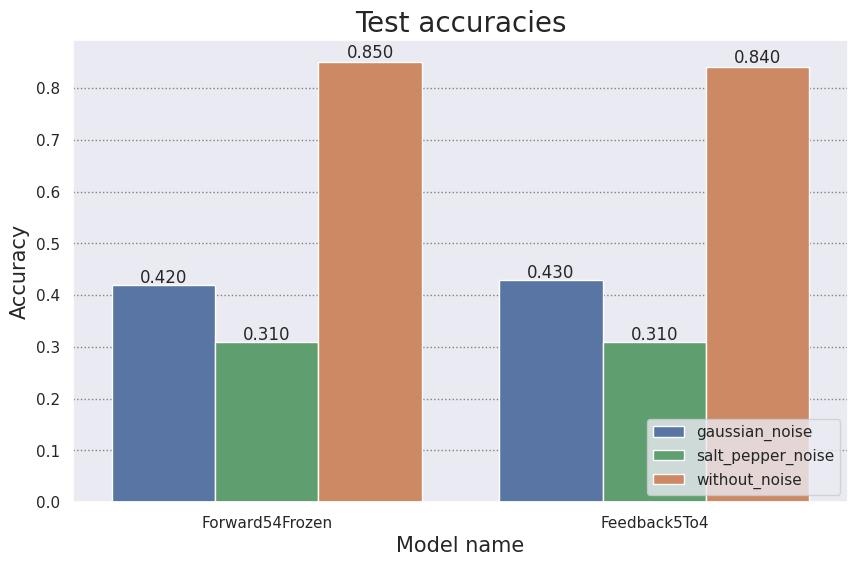

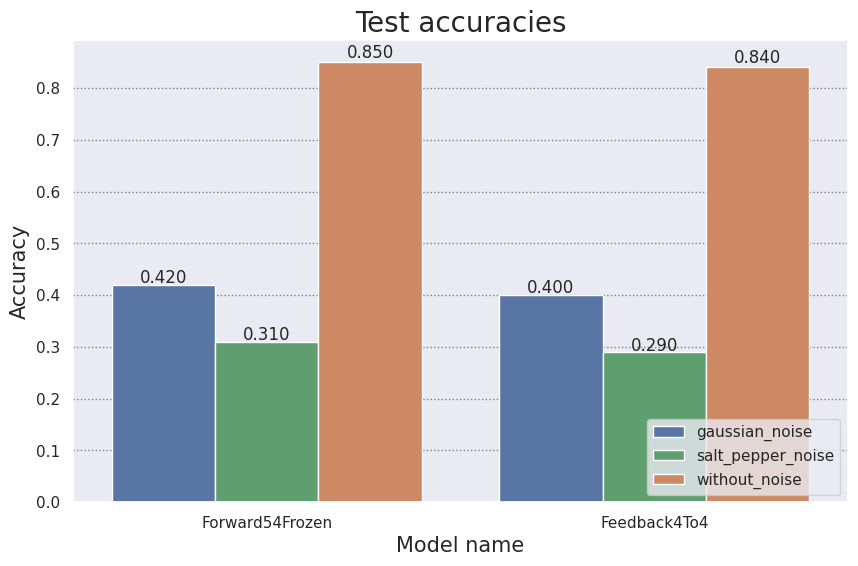

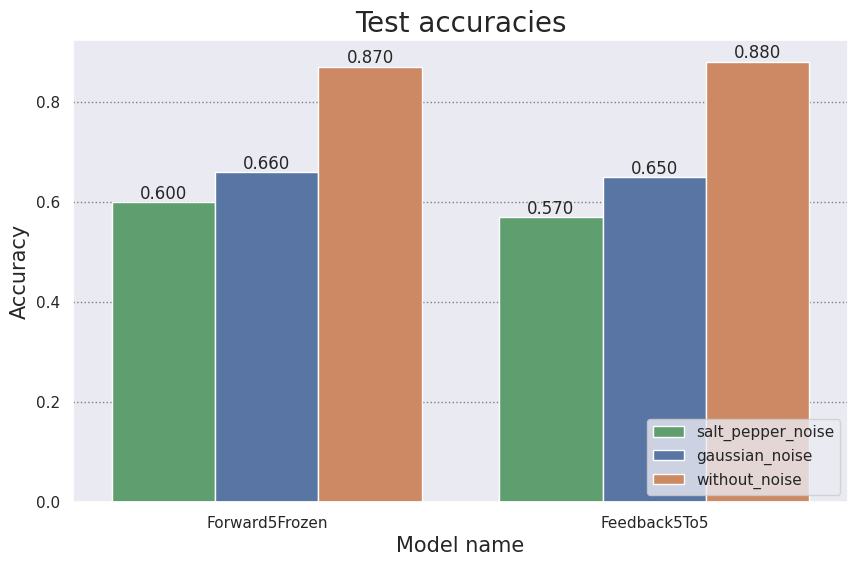

In [63]:
for name_forw, forw, name_feedback, feedback in compare_pairs:
    prepare_df = training_res.loc[(training_res['Model name'].str.contains(forw)) |\
                                 (training_res['Model name'].str.contains(feedback))&\
                                 ((~training_res['Model name'].str.contains('projection')))&\
                                 ((~training_res['Model name'].str.contains('ussian')))]
    prepare_df['Model name'] = prepare_df['Model name']\
                                        .str.replace(forw, name_forw)\
                                        .str.replace(feedback, name_feedback)
    plot_bar_plot(prepare_df.sort_values(by="Model name", ascending=False))

In [134]:
def plot_bar_based_on_pairs(pairs, figsize=(30,5)):
    df_nets = training_res.loc[(training_res['Model name'].str.contains(pairs[0][1]))]
    df_nets['Model name'] = df_nets['Model name'].str.replace(pairs[0][1], pairs[0][0])  
    
    for fn, f in pairs[1:]:                                      
        df_nets = pd.concat([df_nets, 
                            training_res.loc[(training_res['Model name'].str.contains(f))]]) 
        df_nets.drop(df_nets[df_nets['Model name'].str.contains("projection") | df_nets['Model name'].str.contains("not_frozen")].index, inplace = True)
        df_nets['Model name'] = df_nets['Model name'].str.replace(f, fn)
        
    plot_bar_plot(df_nets.sort_values(by=["Model name", "Accuracy","Data noise"], ascending=True), figsize=figsize)

/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/1892789481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nets['Model name'] = df_nets['Model name'].str.replace(pairs[0][1], pairs[0][0])
/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/1892789481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nets['Model name'] = df_nets['Model name'].str.replace(pairs[0][1], pairs[0][0])
/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/1892789481.py:3: SettingWithCopyWarning: 
A value is trying

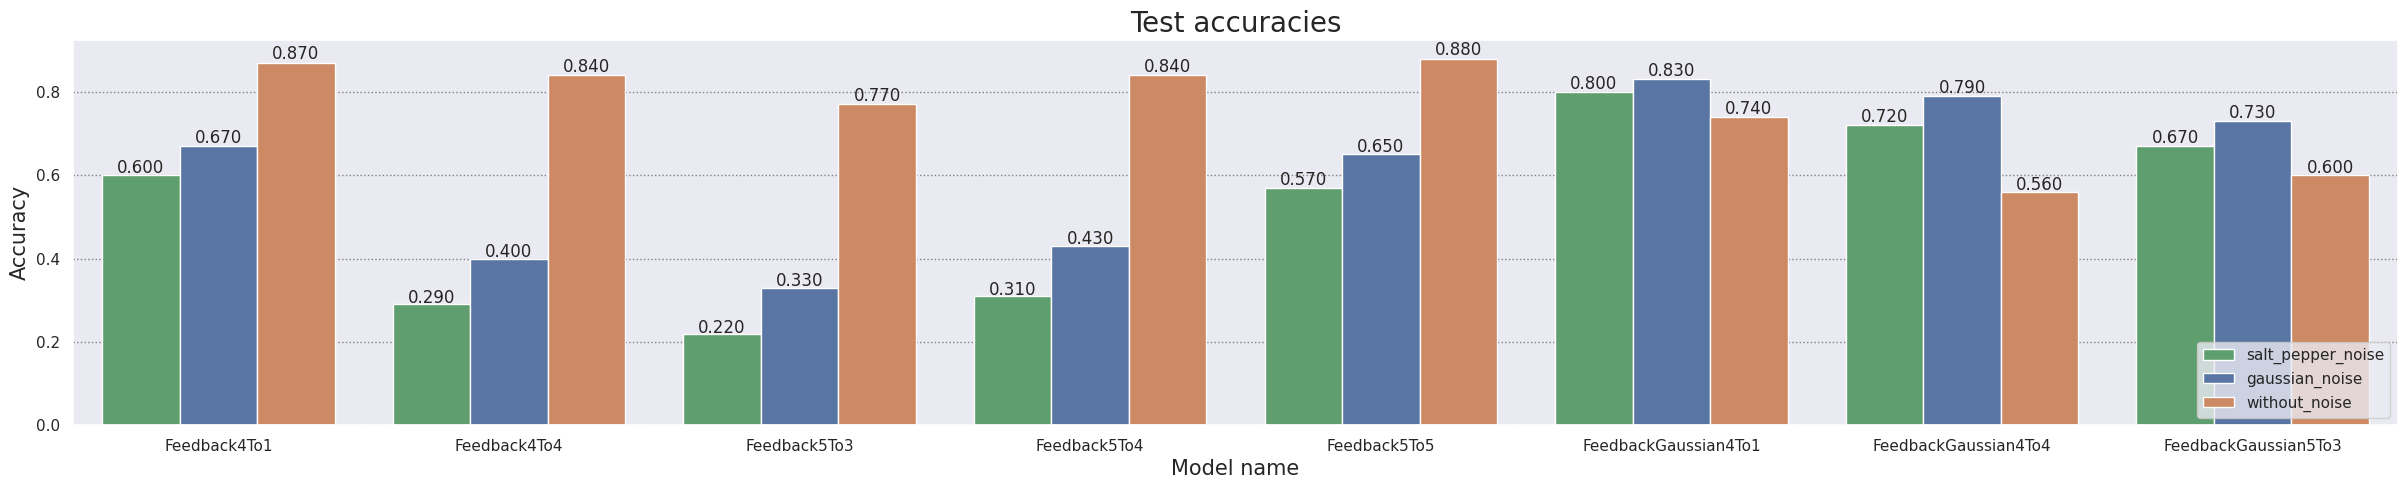

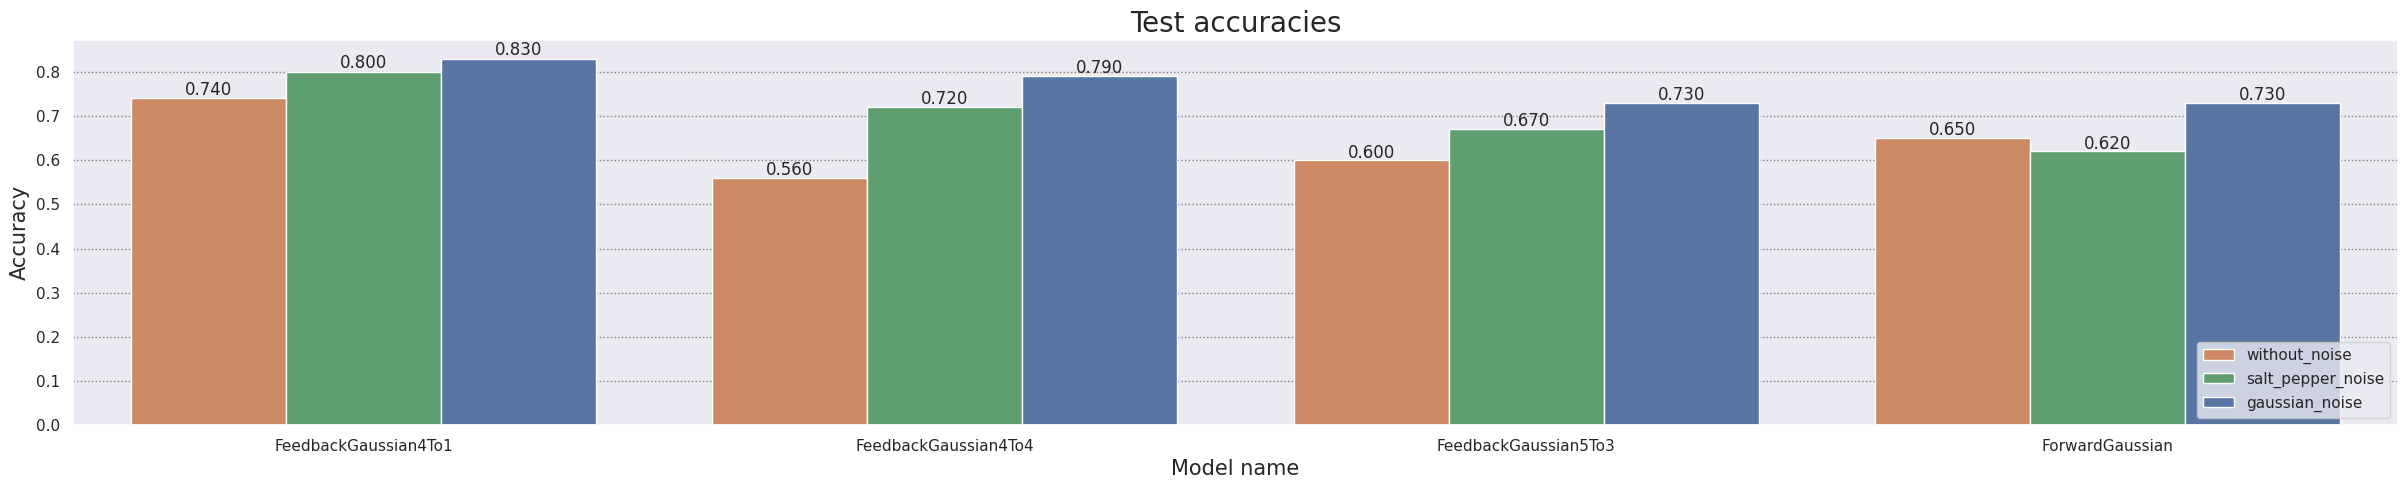

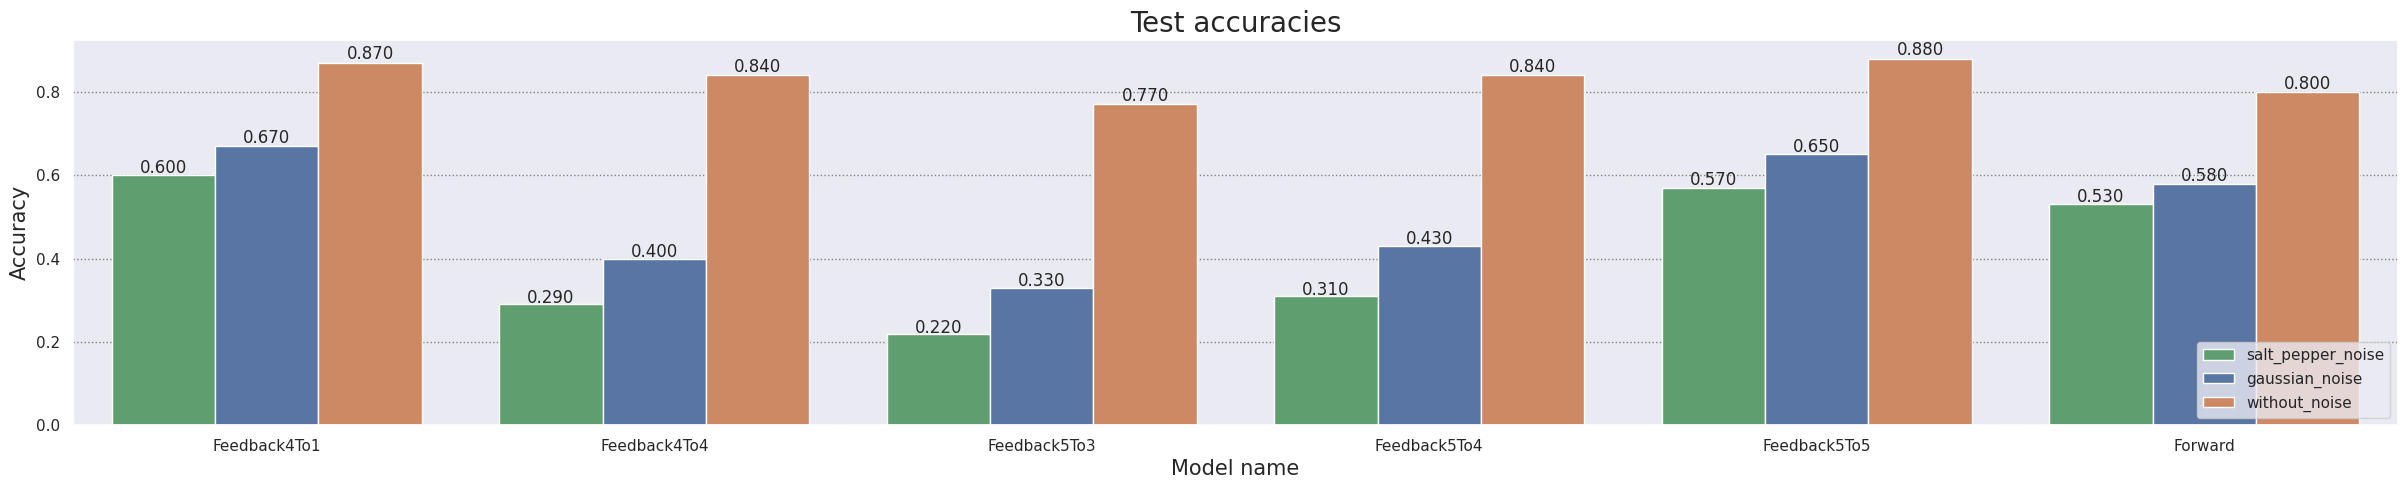

In [132]:
just_feedback_gaussian = [(fn, f) for _, _, fn, f in compare_pairs_gaussian]
compare_pairs = [("Forward543Frozen","frozenVGG16-Forward_5_4_3_blocks_not_frozen", "Feedback5To3","frozenVGG16-Feedback_5block_to_3block"),\
                ("Forward54Frozen","frozenVGG16-Forward_5_4_blocks_not_frozen", "Feedback5To4", "frozenVGG16-Feedback_5block_to_4block"),\
                ("Forward54Frozen","frozenVGG16-Forward_5_4_blocks_not_frozen", "Feedback4To4","frozenVGG16-Feedback_4block_to_4block"),\
                ("Forward5Frozen","frozenVGG16-Forward_5block_not_frozen", "Feedback5To5","frozenVGG16-Feedback_5block_to_5block"),\
                ("Forward5Frozen","frozenVGG16-Forward_5block_not_frozen", "Feedback4To1","frozenVGG16-Feedback_4block_to_1block")]
forward = [("Forward", "frozenVGG16-Forward"), ("ForwardGaussian", "frozenVGG16TrainGaussianNoise-Forward")]
just_feedback = [(fn, f) for _, _, fn, f in compare_pairs]
just_feedback.extend(just_feedback_gaussian)
plot_bar_based_on_pairs(just_feedback)

gaussian = just_feedback_gaussian.copy()
gaussian.extend([forward[1],])
plot_bar_based_on_pairs(gaussian)

not_gaussian = [(fn, f) for _, _, fn, f in compare_pairs]
not_gaussian.extend([forward[0],])
plot_bar_based_on_pairs(not_gaussian)



/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/778993097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nets['Model name'] = df_nets['Model name'].str.replace(pairs[0][1], pairs[0][0])


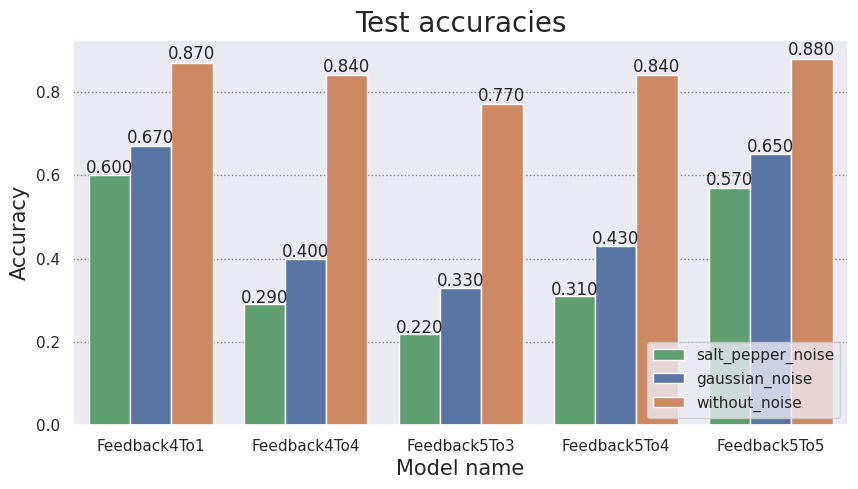

In [138]:
not_gaussian = [(fn, f) for _, _, fn, f in compare_pairs]
plot_bar_based_on_pairs(not_gaussian, figsize=(10,5))

/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/2592499756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepare_df['Model name'] = prepare_df['Model name']\
/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/2592499756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepare_df['Model name'] = prepare_df['Model name']\
/scratch/slurm_tmpdir/job_21787596/ipykernel_3307193/2592499756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

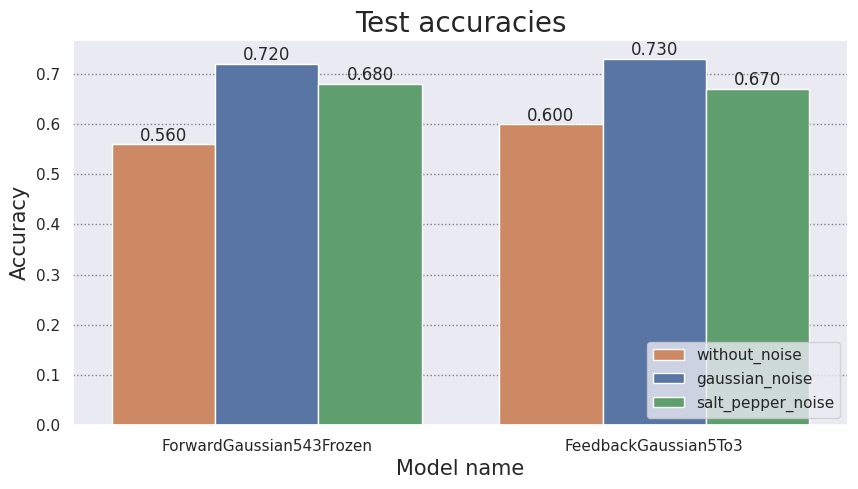

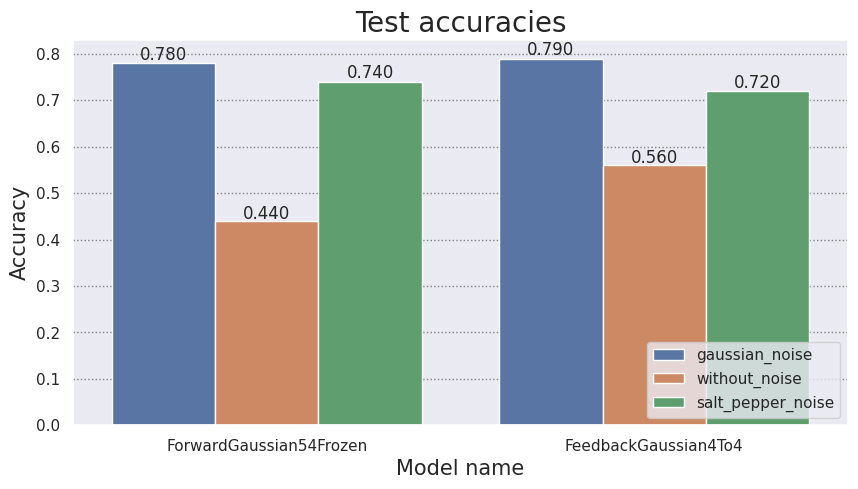

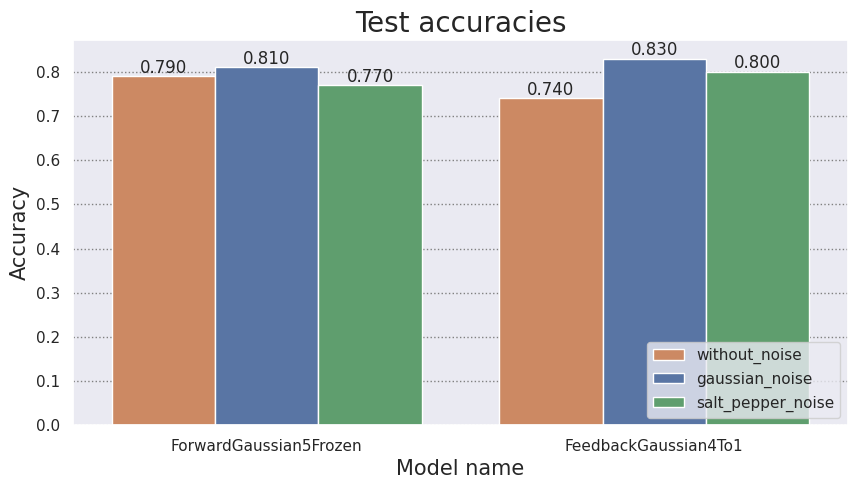

In [135]:
for name_forw, forw, name_feedback, feedback in compare_pairs_gaussian:
    prepare_df = training_res.loc[(training_res['Model name'].str.contains(forw)) |\
                                 (training_res['Model name'].str.contains(feedback))&\
                                 ((~training_res['Model name'].str.contains('projection')))&\
                                 ((~training_res['Model name'].str.contains('6-')))]
    prepare_df['Model name'] = prepare_df['Model name']\
                                        .str.replace(forw, name_forw)\
                                        .str.replace(feedback, name_feedback)
    plot_bar_plot(prepare_df.sort_values(by="Model name", ascending=False), figsize=(10,5))